### Insurance Prediction Project
#### by Nikita Pande

Price Prediction of a dataset contaning data about Insurance.I'll use pandas, numpy and re packages for data manipulation, matplotlib and seaborn for data visualization & Randomforest Regression for this model.

<h1 style='color: black; text-align: center;border-radius: 25px; background-color: #7FFFD4; opacity: .9;'>Objective <h1>


## Import Libraries

In [1]:
# Data wrangling
import pandas as pd
import numpy as np

# for Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

# Model
from sklearn.ensemble import RandomForestRegressor

## Loading Dataset

In [2]:
# Loading the Dataset
Insurance = pd.read_csv(r"C:\Users\HP\Desktop\demo\InsurancePrediction\insurance.csv", sep=',', encoding='latin-1')
Insurance

age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]

## Understand the Data

In [3]:
Insurance.shape

(1338, 7)

In [4]:
Insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
Insurance.describe()

age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000

## EDA 
### Data Preprocessing

#### Check for Missing values

In [6]:
Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

* There is No missing Values

#### Check for Outliers

<AxesSubplot:>

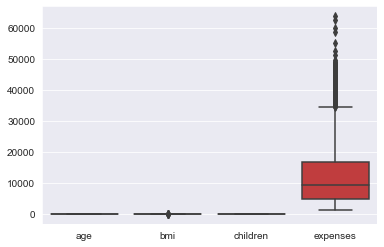

In [7]:
sns.boxplot(data=Insurance)

* We have Outliers in bmi and expenses column 
* To treat them I use winsorization technique

In [8]:
i=Insurance.select_dtypes(include=[np.number]).columns
i

Index(['age', 'bmi', 'children', 'expenses'], dtype='object')

* outlier treatment funtion

In [9]:
def outliers(df,colname):
    q1 = df[colname].quantile(0.25)
    q3 = df[colname].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low_limit = q1-1.5*iqr #acceptable range
    upper_limit = q3+1.5*iqr #acceptable range
    df[colname]=(np.where(df[colname] > upper_limit,upper_limit,df[colname])) 
    df[colname]=np.where(df[colname] < low_limit,low_limit,df[colname])
    return df[colname]

* Apply Above Function on Insurance Dataset

In [10]:
print(outliers(Insurance,i))

       age   bmi  children  expenses
0     19.0  27.9       0.0  16884.92
1     18.0  33.8       1.0   1725.55
2     28.0  33.0       3.0   4449.46
3     33.0  22.7       0.0  21984.47
4     32.0  28.9       0.0   3866.86
...    ...   ...       ...       ...
1333  50.0  31.0       3.0  10600.55
1334  18.0  31.9       0.0   2205.98
1335  18.0  36.9       0.0   1629.83
1336  21.0  25.8       0.0   2007.95
1337  61.0  29.1       0.0  29141.36

[1338 rows x 4 columns]


#### Again Check for Outliers

<AxesSubplot:>

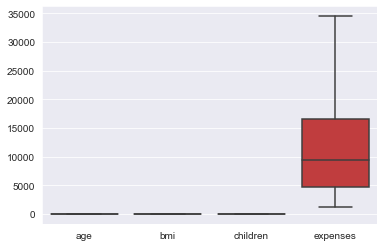

In [11]:
sns.boxplot(data=Insurance)

* No outliers found

### Visualization of Dataset

In [12]:
Insurance.children.value_counts()

0.0    574
1.0    324
2.0    240
3.0    157
4.0     25
5.0     18
Name: children, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

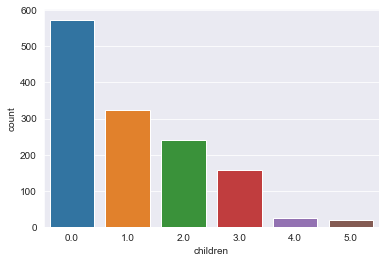

In [13]:
sns.countplot(Insurance.children)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

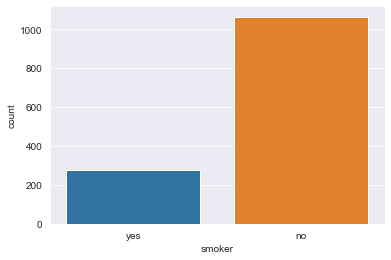

In [14]:
sns.countplot(Insurance.smoker)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

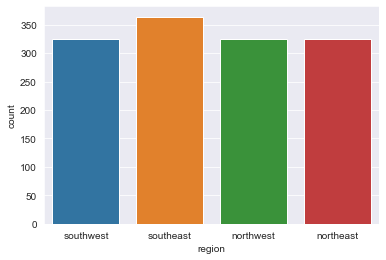

In [15]:
sns.countplot(Insurance.region)

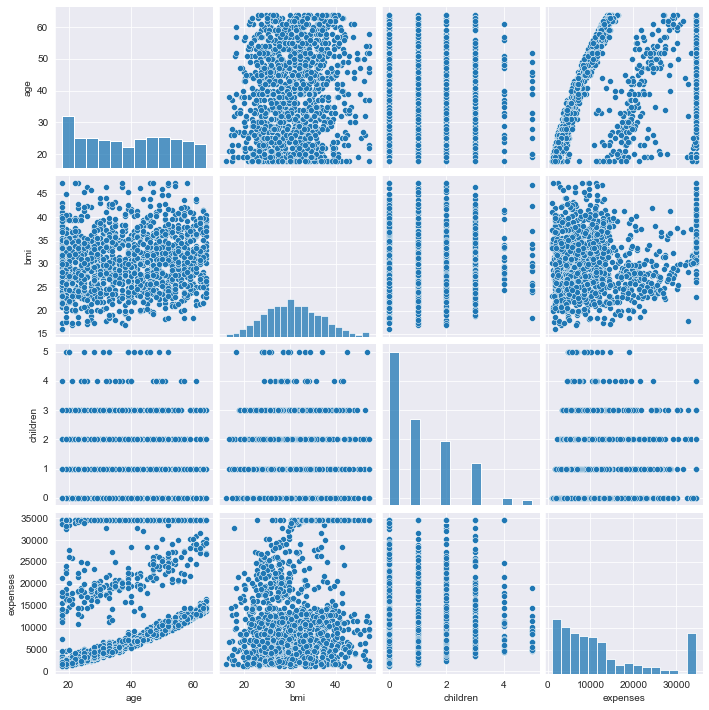

In [16]:
sns.pairplot(Insurance)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


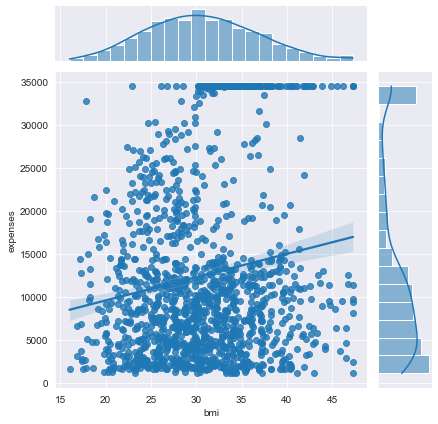

In [17]:
sns.jointplot('bmi', 'expenses', data=Insurance, kind = 'reg')

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

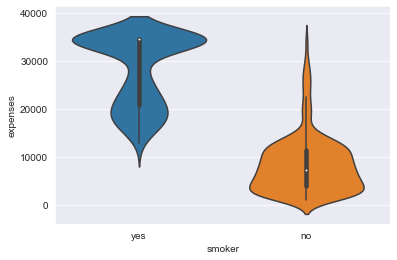

In [18]:
sns.violinplot(y='expenses', x='smoker', data=Insurance)

In [19]:
import plotly.express as px

fig = px.pie(Insurance,names='sex',color='sex',
             color_discrete_map={'Yes':'red',
                                 'No':'green'})
fig.show()

## Labeling the data
* we need to convert category to number

In [20]:
Insurance.head()

age     sex   bmi  children smoker     region  expenses
0  19.0  female  27.9       0.0    yes  southwest  16884.92
1  18.0    male  33.8       1.0     no  southeast   1725.55
2  28.0    male  33.0       3.0     no  southeast   4449.46
3  33.0    male  22.7       0.0     no  northwest  21984.47
4  32.0    male  28.9       0.0     no  northwest   3866.86

In [21]:
# #Employee Numeric columns
Insurance_num = Insurance[Insurance.select_dtypes(include=[np.number]).columns.tolist()]
Insurance_num.head(3)

age   bmi  children  expenses
0  19.0  27.9       0.0  16884.92
1  18.0  33.8       1.0   1725.55
2  28.0  33.0       3.0   4449.46

In [22]:
Insurance_cat = Insurance[Insurance.select_dtypes(include=['object']).columns.tolist()]
Insurance_cat.head(5)

sex smoker     region
0  female    yes  southwest
1    male     no  southeast
2    male     no  southeast
3    male     no  northwest
4    male     no  northwest

In [23]:
from sklearn.preprocessing import LabelEncoder
Insurance_cat=Insurance_cat.apply(LabelEncoder().fit_transform)
Insurance_cat.head(5)
# label in ascending order

sex  smoker  region
0    0       1       3
1    1       0       2
2    1       0       2
3    1       0       1
4    1       0       1

In [24]:
Insurance = pd.concat([Insurance_num, Insurance_cat],axis=1)

## Correlation Matrix

In [25]:
Insurance.corr()

age       bmi  children  expenses       sex    smoker    region
age       1.000000  0.111996  0.042469  0.313394 -0.020856 -0.025019  0.002127
bmi       0.111996  1.000000  0.013580  0.161171  0.044817  0.003366  0.157689
children  0.042469  0.013580  1.000000  0.073074  0.017163  0.007673  0.016569
expenses  0.313394  0.161171  0.073074  1.000000  0.052322  0.785958 -0.016890
sex      -0.020856  0.044817  0.017163  0.052322  1.000000  0.076185  0.004588
smoker   -0.025019  0.003366  0.007673  0.785958  0.076185  1.000000 -0.002181
region    0.002127  0.157689  0.016569 -0.016890  0.004588 -0.002181  1.000000

<AxesSubplot:>

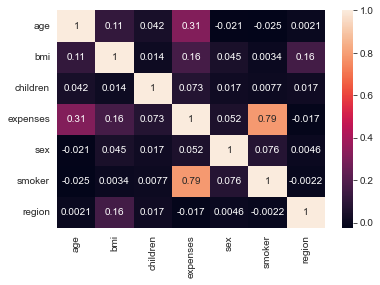

In [26]:
sns.heatmap(Insurance.corr(),annot = True)

* collinearity not exist

### Data Partition

In [27]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Insurance.drop('expenses', axis = 1)
Y = np.sqrt(Insurance[['expenses']])
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=31)

In [28]:
df = pd.concat([X_train,y_train], axis=1)
df.head()

age   bmi  children  sex  smoker  region    expenses
172  18.0  16.0       0.0    1       0       0   41.167949
599  52.0  37.5       2.0    0       0       1  182.953464
559  19.0  35.5       0.0    1       0       1   40.576225
449  35.0  38.6       1.0    1       0       3   69.009637
802  21.0  22.3       1.0    1       0       3   45.859350

Model Building

H0 :- There is no Linear relationship between Resale and Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length, Curb weight,Fuel capacity,Fuel efficiency

Vs

H1 :- There is Linear relationship between Resale and Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length, Curb weight,Fuel capacity,Fuel efficiency

Alpha = 0.05 (5%)

In [29]:
import statsmodels.formula.api as smf
model2=smf.ols('expenses ~ age+bmi+children+sex+smoker+region',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     547.1
Date:                Thu, 19 Jan 2023   Prob (F-statistic):          7.99e-301
Time:                        07:14:05   Log-Likelihood:                -4158.8
No. Observations:                 936   AIC:                             8332.
Df Residuals:                     929   BIC:                             8366.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.4306      3.843      3.235      0.001       4.889      19.972
age            1.3648      0.049     27.771      0.000       1.268       1.461
bmi            0.6551      0.114      5.765      0.000       0.432       0.878
children       3.1219      0.559      5.588      0.000       2.026       4.218
sex           -2.5422      1.360     -1.869      0.062      -5.212       0.127
smoker        80.5118      1.668     48.256      0.000      77.237      83.786
region        -1.3716      0.622     -2.205      0.028      -2.592      -0.151
==============================================================================
Omnibus:                      410.465   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1574.366
Skew:                           2.139   Prob(JB):                         0.00
Kurtosis:                       7.697   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is Linear relationship between expenses and age , bmi,smoker
There is no Linear relationship between expenses and sex,smoker,children
so we will remove and re-run the model
74.7% is accuracy of model , so we say model is good fit

In [30]:
import statsmodels.formula.api as smf
model2=smf.ols('expenses ~ age+bmi+children+smoker',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               expenses   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     813.0
Date:                Thu, 19 Jan 2023   Prob (F-statistic):          6.47e-302
Time:                        07:14:06   Log-Likelihood:                -4163.1
No. Observations:                 936   AIC:                             8336.
Df Residuals:                     931   BIC:                             8360.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7054      3.806      2.813      0.005       3.235      18.175
age            1.3701      0.049     27.828      0.000       1.273       1.467
bmi            0.5988      0.112      5.338      0.000       0.379       0.819
children       3.1063      0.560      5.543      0.000       2.007       4.206
smoker        80.2332      1.668     48.091      0.000      76.959      83.507
==============================================================================
Omnibus:                      409.708   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1580.203
Skew:                           2.131   Prob(JB):                         0.00
Kurtosis:                       7.728   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
train_pred = model2.predict(X_train)
test_pred = model2.predict(X_test)

In [32]:
Linear_Regression_train=r2_score(y_train, train_pred)
Linear_Regression_train

0.7774238581081359

* There is Linear relationship between expenses and age , bmi,smoker
* 74.4% is accuracy of model , so we say model is good fit
* Y = (-7362.9361) + 242.1836 * age + 188.6133 * bmi +410.5600 * children +1.997e+04 *smoker	

In [33]:
X1=df.loc[:,['age', 'bmi','children','smoker']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

age         7.992850
bmi         8.400756
children    1.813885
smoker      1.255196
dtype: float64

In [34]:
df.head()

age   bmi  children  sex  smoker  region    expenses
172  18.0  16.0       0.0    1       0       0   41.167949
599  52.0  37.5       2.0    0       0       1  182.953464
559  19.0  35.5       0.0    1       0       1   40.576225
449  35.0  38.6       1.0    1       0       3   69.009637
802  21.0  22.3       1.0    1       0       3   45.859350

### Prediction on Test Data (unseen data)

In [35]:
df1_test=pd.concat([X_test,y_test],axis=1)

df1_test.head()

age   bmi  children  sex  smoker  region    expenses
1135  50.0  28.1       3.0    0       0       1  105.288128
1189  23.0  28.0       0.0    0       0       3  114.571724
1138  33.0  30.3       0.0    1       0       2   60.863372
1233  58.0  23.3       0.0    1       0       3  106.515351
780   30.0  24.4       3.0    1       1       3  135.126681

In [36]:
df1_test['Prediction']=model2.predict(df1_test) # predict = all row prediction ( Auto )
df1_test.head()

age   bmi  children  sex  smoker  region    expenses  Prediction
1135  50.0  28.1       3.0    0       0       1  105.288128  105.353128
1189  23.0  28.0       0.0    0       0       3  114.571724   58.982662
1138  33.0  30.3       0.0    1       0       2   60.863372   74.060453
1233  58.0  23.3       0.0    1       0       3  106.515351  104.120447
780   30.0  24.4       3.0    1       1       3  135.126681  155.969646

In [37]:
Y = (-7362.9361) +(242.1836 * 50.0) + (188.6133 * 28.1) +(410.5600 * 3.0) +(1.997e+04 *0)
Y

11277.95763

In [38]:
Linear_Regression_test=r2_score(y_test, test_pred)
Linear_Regression_test

0.7130703258749995

# Random Forest Regressor

In [39]:
Insurance.head()

age   bmi  children  expenses  sex  smoker  region
0  19.0  27.9       0.0  16884.92    0       1       3
1  18.0  33.8       1.0   1725.55    1       0       2
2  28.0  33.0       3.0   4449.46    1       0       2
3  33.0  22.7       0.0  21984.47    1       0       1
4  32.0  28.9       0.0   3866.86    1       0       1

In [40]:
from sklearn.model_selection import train_test_split


# define our input variable (X) & output variable
X = Insurance.drop(['expenses'], axis = 1)
Y = np.sqrt(Insurance[['expenses']])
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=901)

In [41]:
#?RandomForestRegressor

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
params = {"n_estimators":[100,200,300],
          "criterion":["mse","mae"],
          "max_depth":[None,1,2,5],
          "min_samples_split":[2,4],
           'min_samples_leaf': [2,4],}
params

{'n_estimators': [100, 200, 300],
 'criterion': ['mse', 'mae'],
 'max_depth': [None, 1, 2, 5],
 'min_samples_split': [2, 4],
 'min_samples_leaf': [2, 4]}

In [44]:
model = RandomForestRegressor()

In [45]:
model_grid = GridSearchCV(estimator=model, param_grid=params,scoring="r2",
                         n_jobs=-1)

In [46]:
model_grid.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [None, 1, 2, 5],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [47]:
model_grid.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [48]:
from sklearn.ensemble import RandomForestRegressor

# by default 100 tree will be form 
Model = RandomForestRegressor( n_estimators=300, # make 15 tress
                               criterion= "mae",
                               max_depth=None,  # each tree will have 4 branches
                               min_samples_leaf=4,
                               min_samples_split=4,# each tree will have parent node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

C:\Users\HP\AppData\Local\Temp/ipykernel_11344/237348534.py:11: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning:

Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.



RandomForestRegressor(criterion='mae', max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=4, n_estimators=300)

### Importance Features

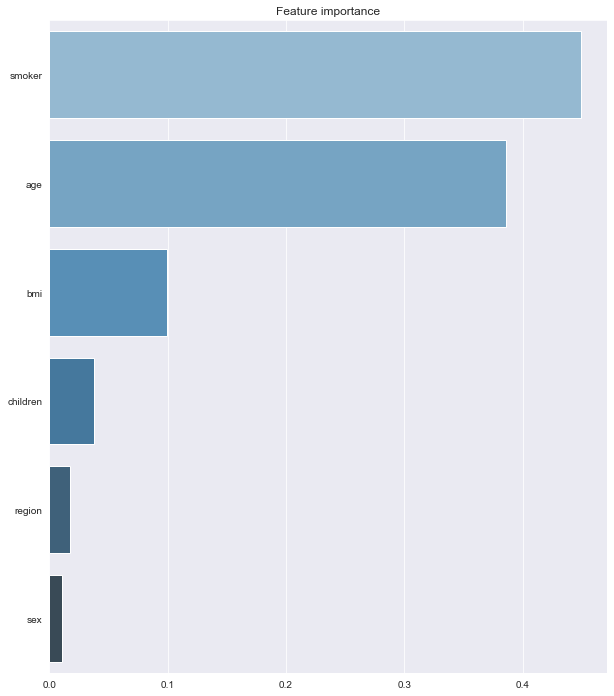

In [49]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

### Random Forest Visualization

In [50]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

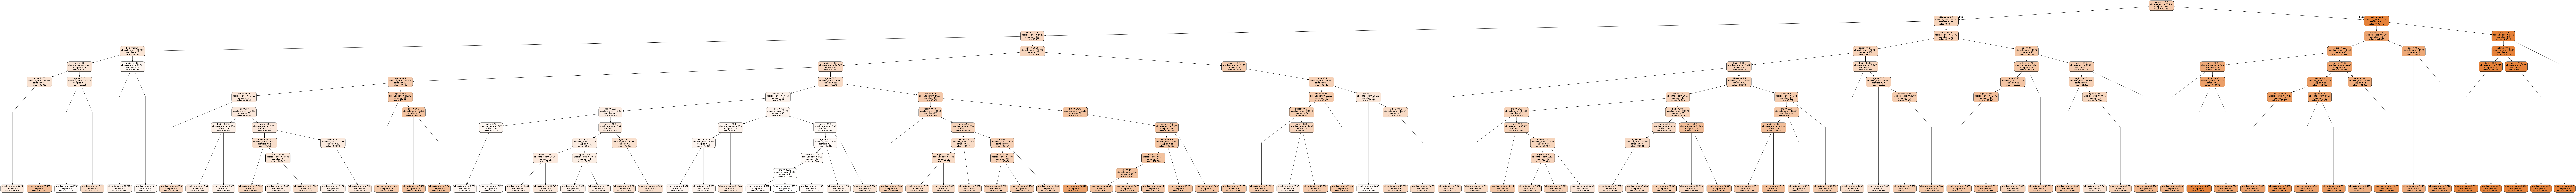

In [51]:
tree = Model.estimators_[9]  # specify the tree number 
# Export the image to a dot file
feature_list = list(X.columns)  # all variable name
export_graphviz(tree, out_file = 'tree.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

#### Predictions on Train Dataset

In [52]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

age   bmi  children  sex  smoker  region    expenses
1081  32.0  27.8       1.0    1       0       1   66.741292
799   33.0  24.8       0.0    1       1       0  133.807810
430   19.0  33.1       0.0    1       0       3  151.930774
1225  33.0  39.8       1.0    0       0       2   69.250704
148   53.0  37.4       1.0    0       0       1  104.688538

In [53]:
train['Predicted']=Model.predict(X_train)
train.head()

age   bmi  children  sex  smoker  region    expenses   Predicted
1081  32.0  27.8       1.0    1       0       1   66.741292   68.632825
799   33.0  24.8       0.0    1       1       0  133.807810  140.414132
430   19.0  33.1       0.0    1       0       3  151.930774   44.821906
1225  33.0  39.8       1.0    0       0       2   69.250704   72.712452
148   53.0  37.4       1.0    0       0       1  104.688538  106.886880

### Model Performance Metrics of Train

In [54]:
import math
print("Forest model info:")
Accuarcy_Train_rf=Model.score(X_train, y_train)
mae_forest = mean_absolute_error(y_train, train['Predicted'])
rmse = math.sqrt(mae_forest)
print("Accuarcy: {}".format(Accuarcy_Train_rf))
print("rmse: {}".format(rmse))


Forest model info:
Accuarcy: 0.8513683758463206
rmse: 2.875307516015583


#### Predictions on Test Dataset

In [55]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

age   bmi  children  sex  smoker  region    expenses
144   30.0  28.7       3.0    1       1       1  144.034683
1234  45.0  27.8       2.0    0       0       2   92.280876
676   55.0  40.8       3.0    0       0       2  111.739876
204   46.0  22.3       0.0    1       0       3   84.540582
85    45.0  22.9       2.0    1       1       1  145.253399

In [56]:
test['Predicted']=Model.predict(X_test)
test.head()

age   bmi  children  sex  smoker  region    expenses   Predicted
144   30.0  28.7       3.0    1       1       1  144.034683  146.533024
1234  45.0  27.8       2.0    0       0       2   92.280876   93.219405
676   55.0  40.8       3.0    0       0       2  111.739876  111.857499
204   46.0  22.3       0.0    1       0       3   84.540582   95.657095
85    45.0  22.9       2.0    1       1       1  145.253399  152.286517

### Model Performance Metrics of Test

In [57]:
import math
print("Forest model info:")
Accuarcy_test_rf=Model.score(X_test, y_test)
mae_forest = mean_absolute_error(y_test, test['Predicted'])
rmse = math.sqrt(mae_forest)
print("Accuarcy: {} %".format(Accuarcy_test_rf*100))
print("rmse: {}".format(rmse))

Forest model info:
Accuarcy: 78.9376418569959 %
rmse: 3.0988864399708937


## Extreme Boosting 

In [58]:
Insurance.head()

age   bmi  children  expenses  sex  smoker  region
0  19.0  27.9       0.0  16884.92    0       1       3
1  18.0  33.8       1.0   1725.55    1       0       2
2  28.0  33.0       3.0   4449.46    1       0       2
3  33.0  22.7       0.0  21984.47    1       0       1
4  32.0  28.9       0.0   3866.86    1       0       1

In [59]:
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [60]:
from sklearn.model_selection import train_test_split


# define our input variable (X) & output variable
X = Insurance.drop(['expenses'], axis = 1)
Y = np.sqrt(Insurance[['expenses']])
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=901)

In [61]:
print('The number of samples into the Train data is {}.'.format(X_train.shape[0]))
print('The number of samples into the test data is {}.'.format(X_test.shape[0]))

The number of samples into the Train data is 936.
The number of samples into the test data is 402.


In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {
        'n_estimators': [100, 200, 300], # number of tress
        'max_depth': [2, 4],  # maximum branches in tree
        'min_samples_leaf': [2,4]  # no. of sample in  child nodes
}

In [64]:
# Gridsearch the parameters to find the best parameters.
model = GradientBoostingRegressor(random_state=10,criterion="squared_error")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=10,  # 10 time 
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GridSearchCV(cv=10,
             estimator=GradientBoostingRegressor(criterion='squared_error',
                                                 random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [2, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [65]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'max_depth': 2, 'min_samples_leaf': 2, 'n_estimators': 100}


In [66]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingRegressor(**gscv_GBM.best_params_)
final_mod_GBM.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor(max_depth=2, min_samples_leaf=2)

### Prediction on Train

In [67]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

age   bmi  children  sex  smoker  region    expenses
1081  32.0  27.8       1.0    1       0       1   66.741292
799   33.0  24.8       0.0    1       1       0  133.807810
430   19.0  33.1       0.0    1       0       3  151.930774
1225  33.0  39.8       1.0    0       0       2   69.250704
148   53.0  37.4       1.0    0       0       1  104.688538

In [68]:
train['Predicted']=final_mod_GBM.predict(X_train)
train.head()

age   bmi  children  sex  smoker  region    expenses   Predicted
1081  32.0  27.8       1.0    1       0       1   66.741292   73.064878
799   33.0  24.8       0.0    1       1       0  133.807810  144.626913
430   19.0  33.1       0.0    1       0       3  151.930774   49.511834
1225  33.0  39.8       1.0    0       0       2   69.250704   73.781364
148   53.0  37.4       1.0    0       0       1  104.688538  113.526285

### Prediction On Test

In [69]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

age   bmi  children  sex  smoker  region    expenses
144   30.0  28.7       3.0    1       1       1  144.034683
1234  45.0  27.8       2.0    0       0       2   92.280876
676   55.0  40.8       3.0    0       0       2  111.739876
204   46.0  22.3       0.0    1       0       3   84.540582
85    45.0  22.9       2.0    1       1       1  145.253399

In [70]:
test['Predicted']=final_mod_GBM.predict(X_test)
test.head()

age   bmi  children  sex  smoker  region    expenses   Predicted
144   30.0  28.7       3.0    1       1       1  144.034683  149.830219
1234  45.0  27.8       2.0    0       0       2   92.280876   96.327446
676   55.0  40.8       3.0    0       0       2  111.739876  113.808753
204   46.0  22.3       0.0    1       0       3   84.540582   92.435101
85    45.0  22.9       2.0    1       1       1  145.253399  151.029281

In [71]:
# Prediction
train_pred = final_mod_GBM.predict(X_train)
test_pred = final_mod_GBM.predict(X_test)

In [72]:
import math
print("Forest model info:")
Accuarcy_train_gb=final_mod_GBM.score(X_train, y_train)
mae_forest = mean_absolute_error(y_train, train_pred)
rmse = math.sqrt(mae_forest)
print("Accuarcy: {} %".format(Accuarcy_train_gb*100))
print("rmse: {}".format(rmse))

Forest model info:
Accuarcy: 84.80819122356684 %
rmse: 3.1114858441366544


#### Accuracy on Test

In [73]:
import math
print("Forest model info:")
Accuarcy_test_Gb=final_mod_GBM.score(X_test, y_test)
mae_forest = mean_absolute_error(y_test, test_pred)
rmse = math.sqrt(mae_forest)
print("Accuarcy: {} %".format(Accuarcy_test_Gb*100))
print("rmse: {}".format(rmse))

Forest model info:
Accuarcy: 79.75300686055222 %
rmse: 3.235547168405218


In [74]:
d1={'Accuracy Train':pd.Series([Linear_Regression_train,Accuarcy_Train_rf,Accuarcy_train_gb]),
    'Accuracy Test':pd.Series([Linear_Regression_test,Accuarcy_test_rf,Accuarcy_test_Gb]),
     
   }

df=pd.DataFrame(d1)
df.index = ["Linear Regression", "Random Forest", "Gradient Boosting"]

df

Accuracy Train  Accuracy Test
Linear Regression        0.777424       0.713070
Random Forest            0.851368       0.789376
Gradient Boosting        0.848082       0.797530

#### Best Prediction accuarcy by Gradient Boosting

#### Export Model

In [75]:
import os
os.chdir(r"C:\Users\HP\Desktop\demo\InsurancePrediction")

### Model Deployment

In [76]:
import pickle
#saving model
pickle.dump(final_mod_GBM,open('build.pkl','wb'))

In [77]:
model=pickle.load(open('build.pkl','rb'))

In [78]:
test.head(1)

age   bmi  children  sex  smoker  region    expenses   Predicted
144  30.0  28.7       3.0    1       1       1  144.034683  149.830219

In [79]:
list(test.iloc[0,:-2])

[30.0, 28.7, 3.0, 1.0, 1.0, 1.0]

In [80]:
model.predict([[30.0, 1.0,28.7, 3.0, 1.0, 1.0]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



array([142.43161228])

In [81]:
model.predict([[30.0, 28.7, 3.0, 1.0, 1.0, 1.0]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



array([149.83021915])

In [82]:
final_mod_GBM.predict([[30.0, 28.7, 3.0, 1.0, 1.0, 1.0]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names



array([149.83021915])